In [344]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [345]:
df = pd.read_csv('heart.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [347]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [348]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot: xlabel='target', ylabel='Count'>

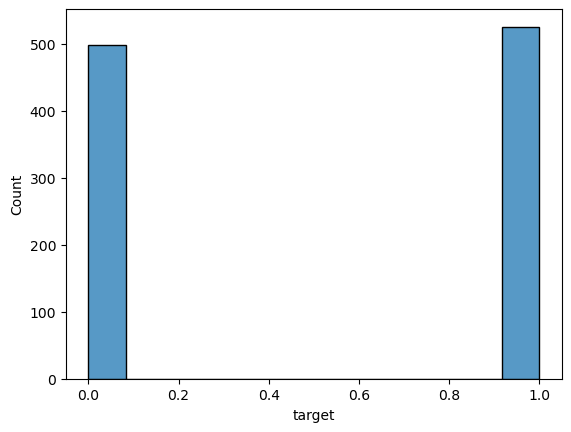

In [349]:
sns.histplot(df['target'])

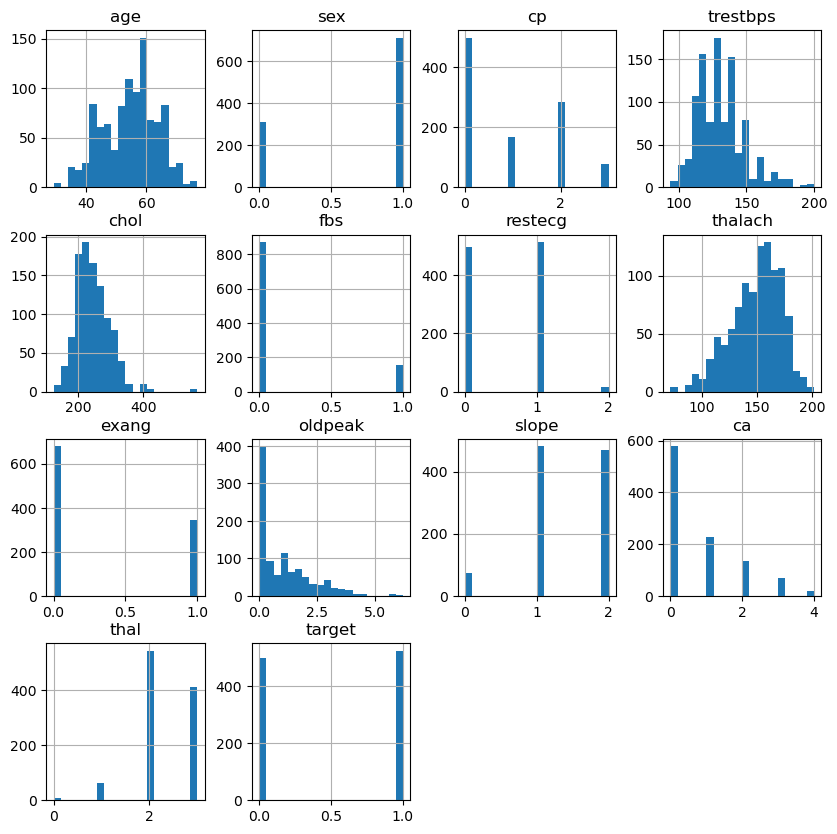

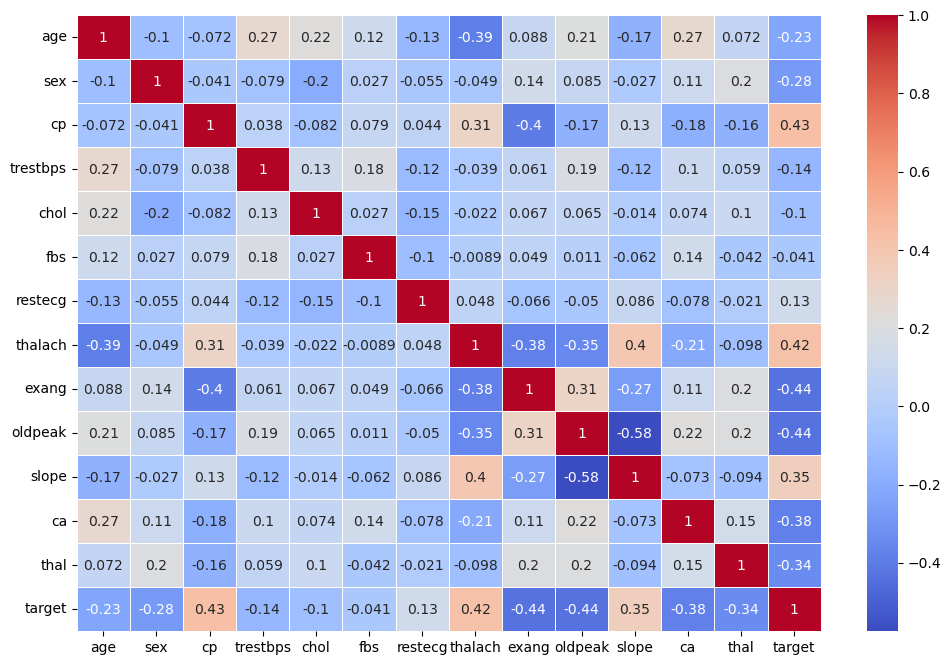

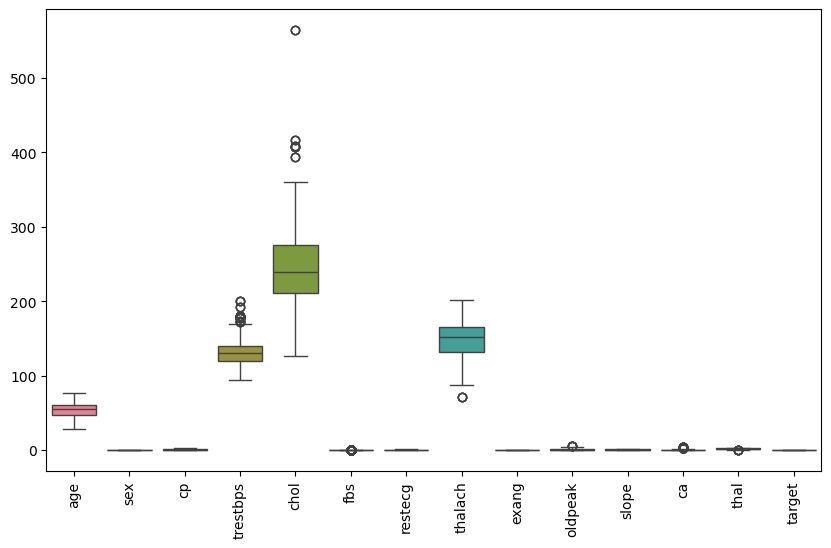

In [350]:
# Построение гистограмм для признаков
df.hist(figsize=(10, 10), bins=20)
plt.show()

# Матрица корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Боксплоты для поиска выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [351]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Определение категориальных и числовых признаков
categorical_columns = ['sex', 'cp', 'restecg'] 
numeric_columns = ['age', 'trestbps', 'chol', 'thalach']

# Преобразование категориальных данных и масштабирование числовых
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Преобразованные данные
X_transformed = preprocessor.fit_transform(df.drop(columns=['target']))
y = df['target']


- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

Best parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       0.75      0.83      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.77       205
weighted avg       0.78      0.78      0.78       205



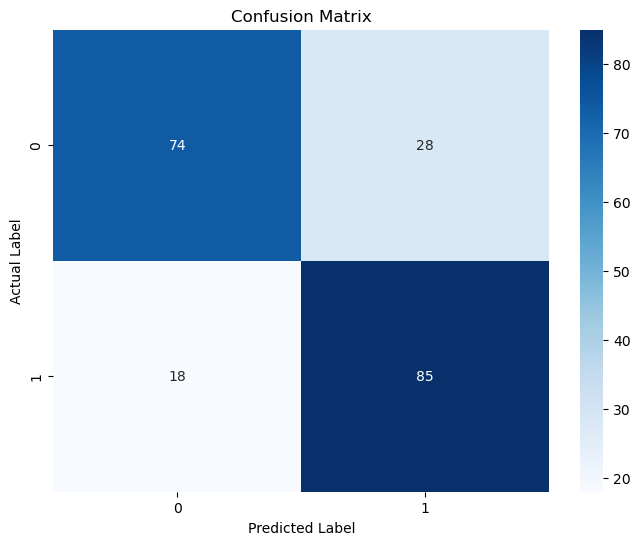

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=99)

# Параметры для настройки
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Логистическая регрессия и подбор гиперпараметров
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Предсказания и отчёт по метрикам
y_pred = clf.predict(X_test)
print("Best parameters found:", clf.best_params_)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

- [ ] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).

- [ ] * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.

Best parameters for SVM: {'C': 100, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.98      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



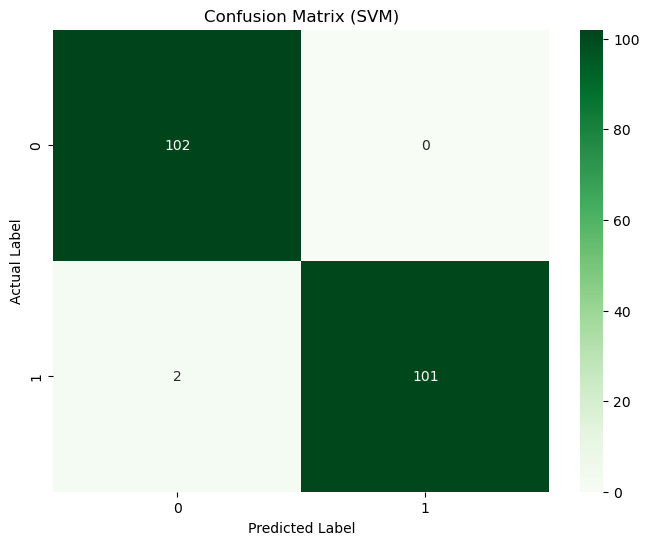

In [353]:
from sklearn.svm import SVC

# Настройка гиперпараметров для SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# SVM модель и GridSearchCV
svm_clf = SVC()
clf_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
clf_svm.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_svm = clf_svm.predict(X_test)
print("Best parameters for SVM:", clf_svm.best_params_)
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix для SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (SVM)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



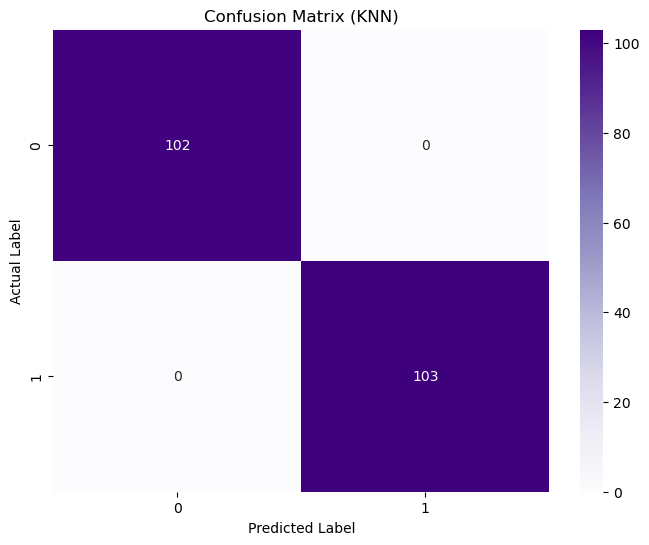

In [354]:
from sklearn.neighbors import KNeighborsClassifier

# Настройка гиперпараметров для KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# KNN модель и GridSearchCV
knn_clf = KNeighborsClassifier()
clf_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')
clf_knn.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_knn = clf_knn.predict(X_test)
print("Best parameters for KNN:", clf_knn.best_params_)
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix для KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix (KNN)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


              precision    recall  f1-score   support

           0       0.82      0.70      0.75       102
           1       0.74      0.84      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.77      0.77       205



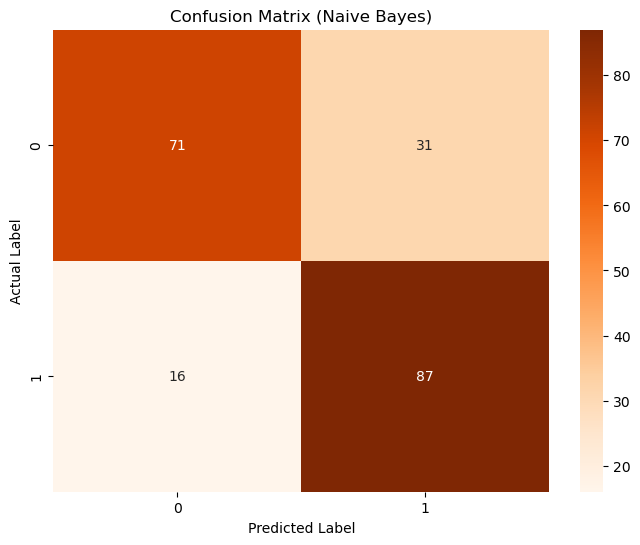

In [355]:
from sklearn.naive_bayes import GaussianNB

# Инициализация модели Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_nb = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix для Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (Naive Bayes)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



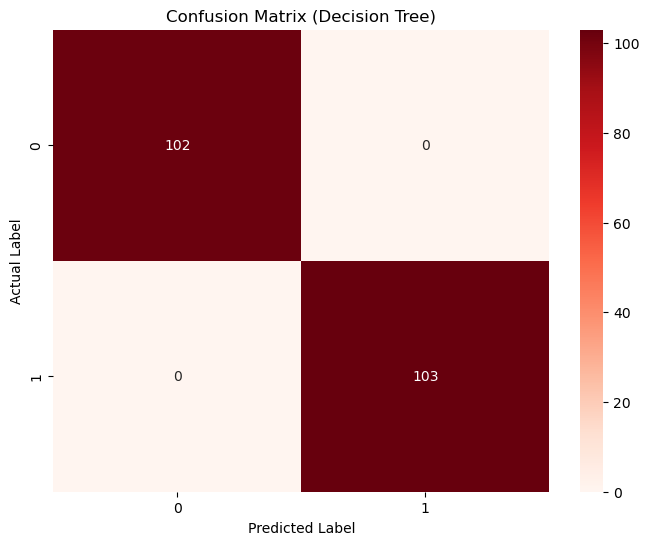

In [356]:
from sklearn.tree import DecisionTreeClassifier

# Настройка гиперпараметров для Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 7, 9, None],
    'criterion': ['gini', 'entropy']
}

# Decision Tree модель и GridSearchCV
tree_clf = DecisionTreeClassifier()
clf_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
clf_tree.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_tree = clf_tree.predict(X_test)
print("Best parameters for Decision Tree:", clf_tree.best_params_)
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix для Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



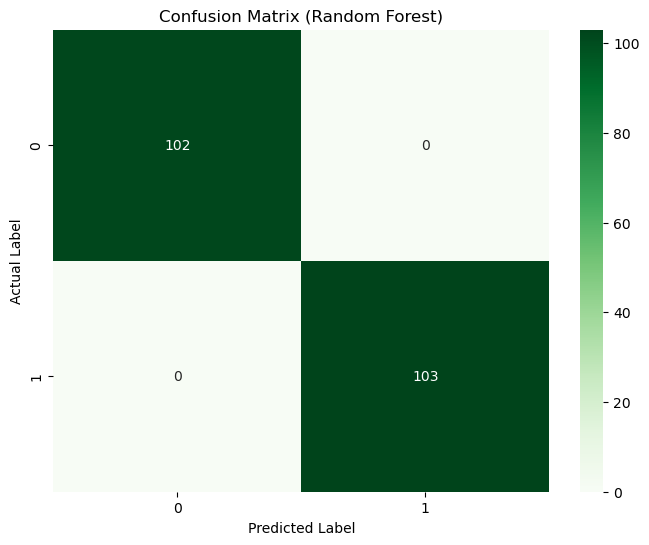

In [357]:
from sklearn.ensemble import RandomForestClassifier

# Настройка гиперпараметров для Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy']
}

# Random Forest модель и GridSearchCV
rf_clf = RandomForestClassifier()
clf_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
clf_rf.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_rf = clf_rf.predict(X_test)
print("Best parameters for Random Forest:", clf_rf.best_params_)
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix для Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Вывод:
Хуже всего справились с предсказанием Naive Bayes и собственная реализация

- [ ] * (**+3 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [358]:
data = pd.read_csv('user_behavior_dataset.csv') 
data.head() 

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [360]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [361]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

<AxesSubplot: xlabel='User Behavior Class', ylabel='Count'>

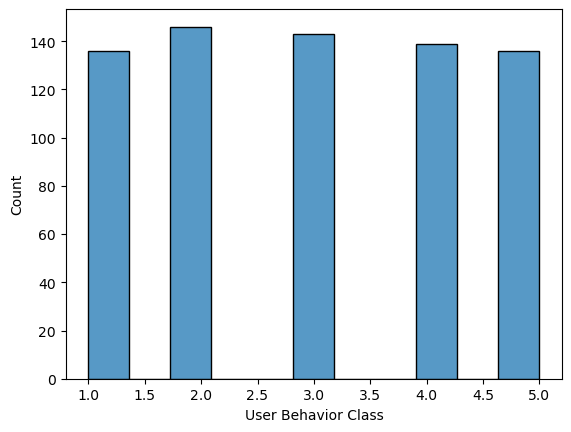

In [362]:
sns.histplot(data['User Behavior Class'])

In [363]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [364]:
data.drop(['User ID', 'Device Model'], axis=1)
data = data.rename(columns={'Operating System':'os', 'App Usage Time (min/day)': 'app_usage_time', 'Screen On Time (hours/day)':'screen_on_time','Battery Drain (mAh/day)':'battery_drain','Number of Apps Installed':'apps_installed', 'Data Usage (MB/day)':'data_usage','Age':'age','Gender':'sex', 'User Behavior Class':'user_class'})

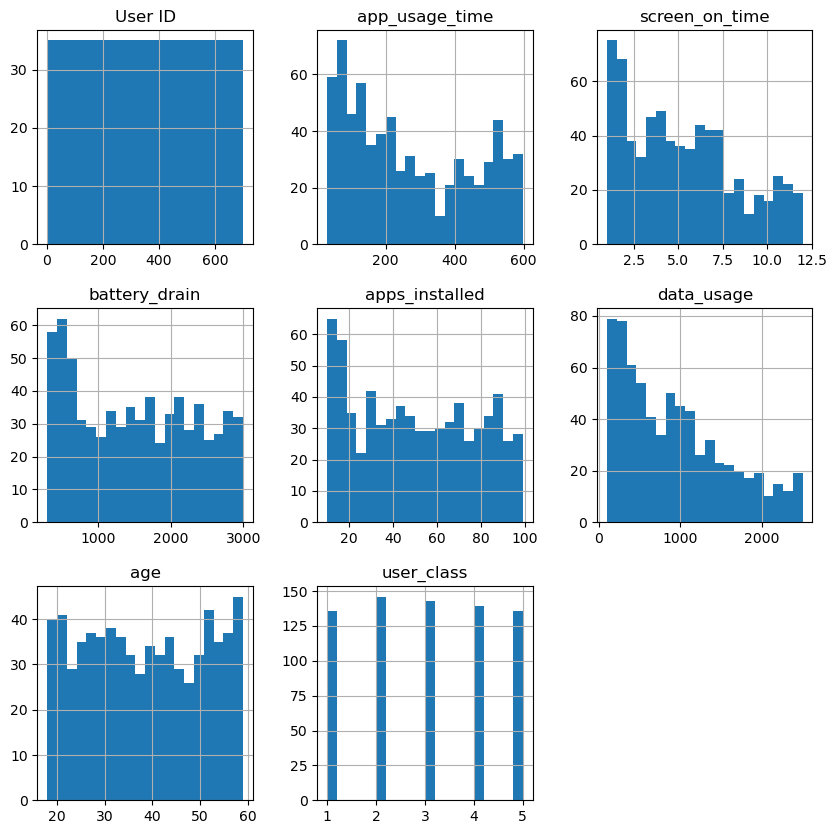

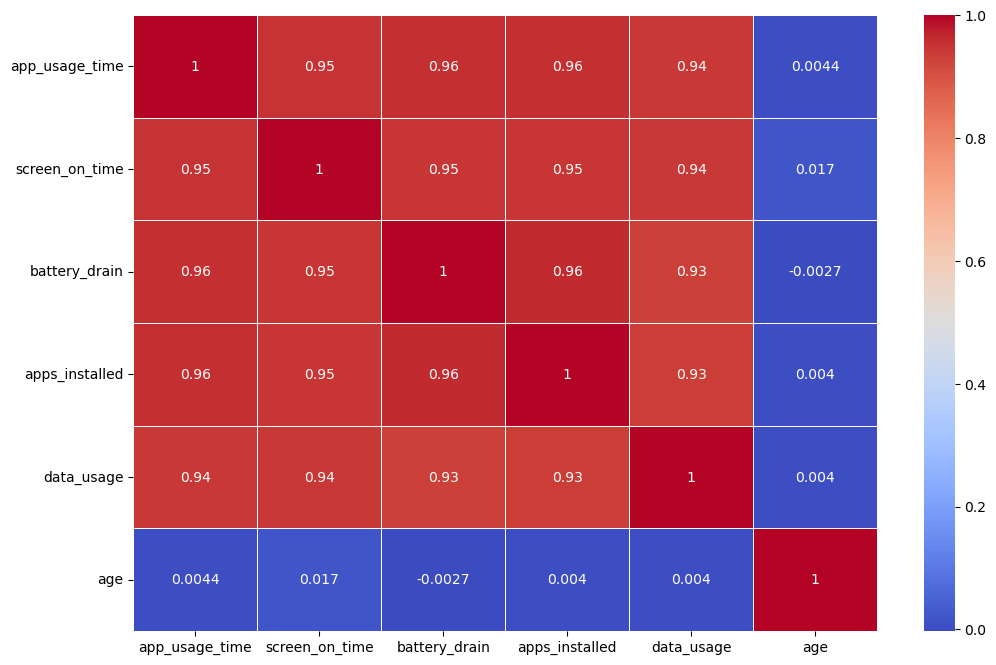

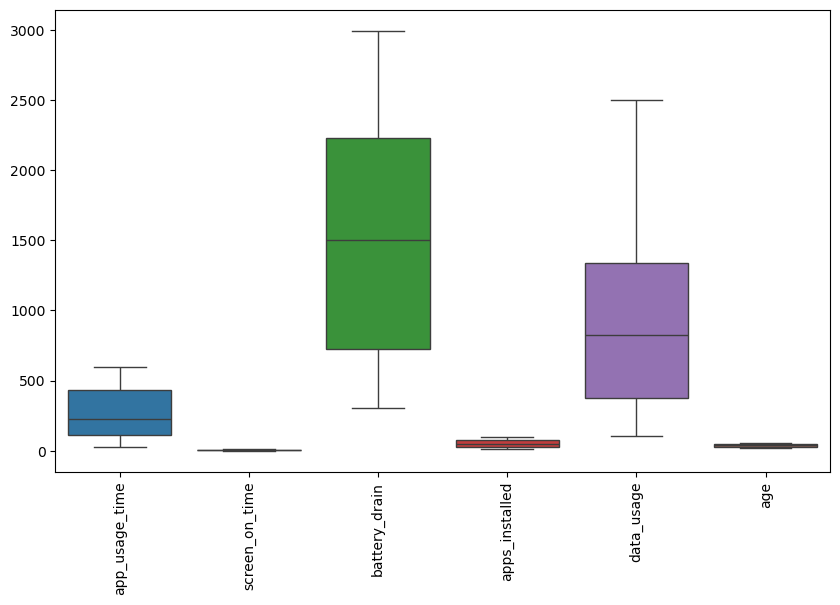

In [365]:
data_numeric_columns = ['app_usage_time','screen_on_time', 'battery_drain', 'apps_installed','data_usage','age']

# Построение гистограмм для признаков
data.hist(figsize=(10, 10), bins=20)
plt.show()

# Матрица корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(data[data_numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Боксплоты для поиска выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data_numeric_columns])
plt.xticks(rotation=90)
plt.show()


In [366]:
data_categorical_columns = ['sex', 'os']

# Преобразование категориальных данных и масштабирование числовых
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_numeric_columns),
        ('cat', OneHotEncoder(), data_categorical_columns)])

# Преобразованные данные
X_transformed = preprocessor.fit_transform(data.drop(columns=['user_class']))
y = data['user_class']


Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        22
           2       0.96      0.84      0.90        32
           3       0.79      0.90      0.84        29
           4       0.92      0.85      0.88        26
           5       1.00      1.00      1.00        31

    accuracy                           0.91       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.91      0.91       140



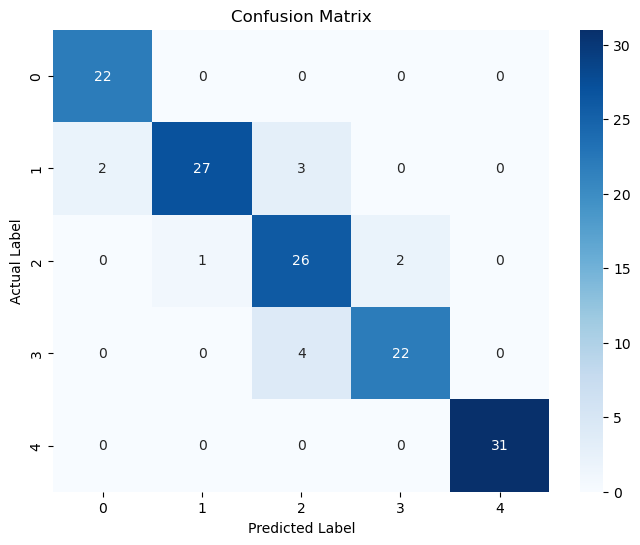

In [367]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=99)

# Параметры для настройки
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Логистическая регрессия и подбор гиперпараметров
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Предсказания и отчёт по метрикам
y_pred = clf.predict(X_test)
print("Best parameters found:", clf.best_params_)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



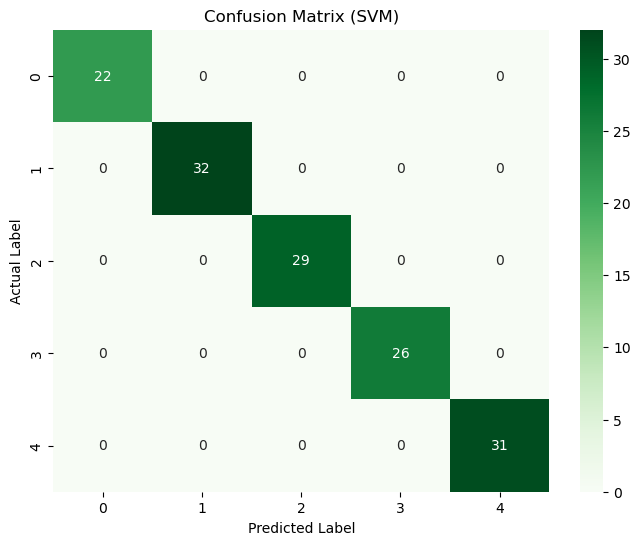

In [368]:
# Настройка гиперпараметров для SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

# SVM модель и GridSearchCV
svm_clf = SVC()
clf_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
clf_svm.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_svm = clf_svm.predict(X_test)
print("Best parameters for SVM:", clf_svm.best_params_)
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix для SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (SVM)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



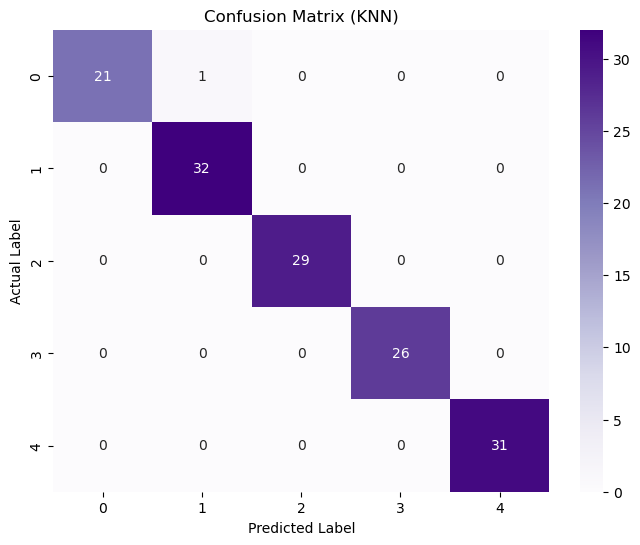

In [369]:
# Настройка гиперпараметров для KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# KNN модель и GridSearchCV
knn_clf = KNeighborsClassifier()
clf_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='accuracy')
clf_knn.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_knn = clf_knn.predict(X_test)
print("Best parameters for KNN:", clf_knn.best_params_)
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix для KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix (KNN)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



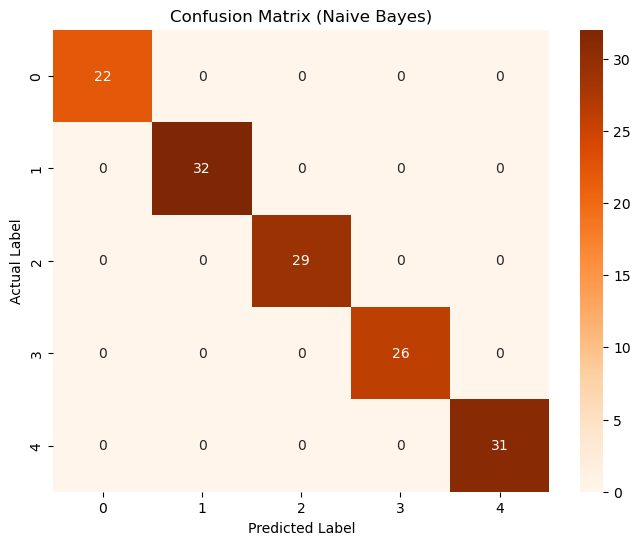

In [370]:
# Инициализация модели Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_nb = nb_clf.predict(X_test)
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix для Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (Naive Bayes)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



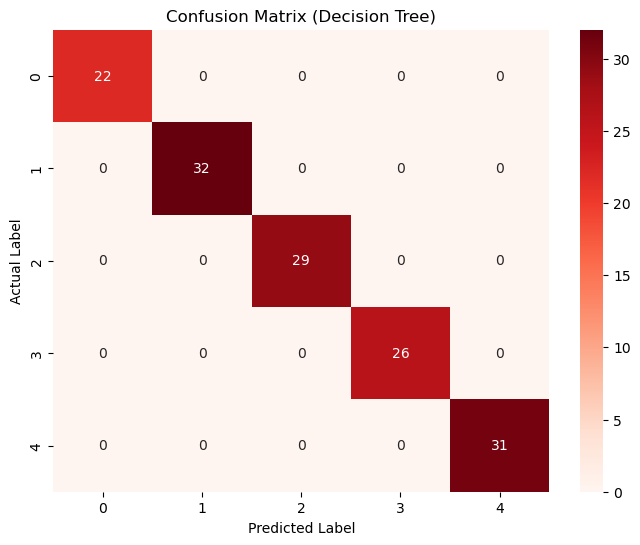

In [371]:
# Настройка гиперпараметров для Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 7, 9, None],
    'criterion': ['gini', 'entropy']
}

# Decision Tree модель и GridSearchCV
tree_clf = DecisionTreeClassifier()
clf_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
clf_tree.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_tree = clf_tree.predict(X_test)
print("Best parameters for Decision Tree:", clf_tree.best_params_)
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix для Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Decision Tree)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        31

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



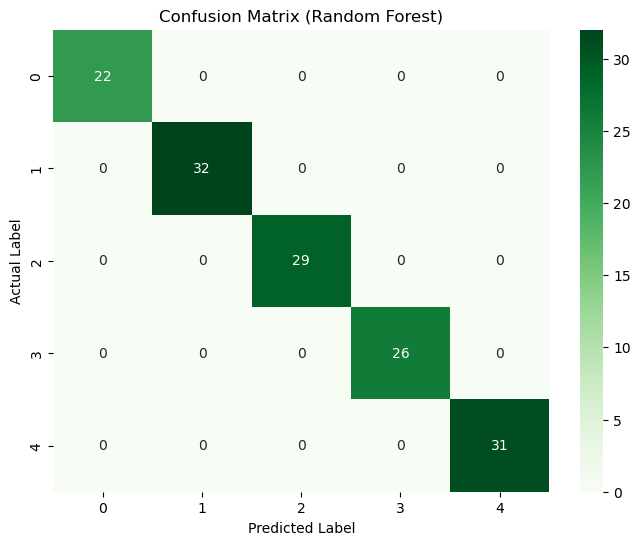

In [372]:
# Настройка гиперпараметров для Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'criterion': ['gini', 'entropy']
}

# Random Forest модель и GridSearchCV
rf_clf = RandomForestClassifier()
clf_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
clf_rf.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_rf = clf_rf.predict(X_test)
print("Best parameters for Random Forest:", clf_rf.best_params_)
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix для Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Вывод:
Предсказание оказалось менее точно на NKNN и собственной реализации